In [ ]:
!pip install ipython==7.34.0 ipykernel==5.5.6
!pip install import_ipynb

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Physics-Informed Neural Networks/Demo/fenics_cfd/neural_network'
os.chdir(path)

import import_ipynb
from data_loading import FlowFieldDataset, train_test_split
from nn_modules import SuperResolutionPICNN
from model_utils import train_model, test_model, evaluate_model, to_numpy
from visualize_data import plot_results, print_metrics, plot_numpy_matrices

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device {device}')
if device.type == 'cuda':
    print(torch.cuda.get_device_name())
    torch.cuda.empty_cache()
# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing Jupyter notebook from data_loading.ipynb
importing Jupyter notebook from nn_modules.ipynb
importing Jupyter notebook from model_utils.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing Jupyter notebook from visualize_data.ipynb
Device cpu


In [ ]:
# npy_velocity_dir = '../blood_flow_simulations/velocity_fields/npy_data'
# npy_pressure_dir = '../blood_flow_simulations/pressure_fields/npy_data'

npy_velocity_dir = '../test/velocity_fields/npy_data'
npy_pressure_dir = '../test/pressure_fields/npy_data'

dataset = FlowFieldDataset(npy_velocity_dir, npy_pressure_dir, load_all_data=False)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

batch_size = 1
num_epochs = 1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

hidden_layers = np.array([16, 32, 32, 32, 32, 32, 32, 32, 16])
model = SuperResolutionPICNN(hidden_layers, use_coords=True).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.MSELoss()
alpha = 0.5

log_interval = 1
model_save_path = '../logs/model_parameters'
loss_save_path = '../logs/losses'

# model_load_path = '../logs/model_params/CNN_model_params_47_epoch_59.pt'
test_loss_save_path = '../logs/test_losses'

Dataset Loaded in 0.0084 s


In [ ]:
# - - - - - Training - - - - -

data_losses, physics_losses = train_model(model, train_loader, optimizer, criterion, num_epochs, device, alpha=alpha,
                                          model_save_path=model_save_path, loss_save_path=loss_save_path, log_interval=log_interval,
                                          is_physics_informed=True)

Model param file name: ../logs/model_parameters/PICNN_model_params_3.pt
Loss file name: ../logs/losses/PICNN_train_losses_7.csv
Allocated Memory: 0.00 MB, Cached Memory: 0.00 MB
Epoch [1/1], Step [1/9], Total Loss: 5750.190430, Data Loss: 268.345276, Physics Loss: 11232.035156
Epoch [1/1], Step [2/9], Total Loss: 3613.743652, Data Loss: 227.633316, Physics Loss: 6999.854004
Epoch [1/1], Step [3/9], Total Loss: 1603.546753, Data Loss: 190.981705, Physics Loss: 3016.111816
Epoch [1/1], Step [4/9], Total Loss: 1588.468262, Data Loss: 172.119507, Physics Loss: 3004.817139
Epoch [1/1], Step [5/9], Total Loss: 1151.540039, Data Loss: 146.937820, Physics Loss: 2156.142334
Epoch [1/1], Step [6/9], Total Loss: 1212.684326, Data Loss: 147.338379, Physics Loss: 2278.030273
Epoch [1/1], Step [7/9], Total Loss: 1072.816528, Data Loss: 158.354019, Physics Loss: 1987.278931
Epoch [1/1], Step [8/9], Total Loss: 778.250061, Data Loss: 151.080551, Physics Loss: 1405.419556
Epoch [1/1], Step [9/9], Total

In [ ]:
# Model param file name: ../logs/model_parameters/PICNN_model_params_1.pt
# Loss file name: ../logs/losses/PICNN_train_losses_4.csv
# Allocated Memory: 0.00 MB, Cached Memory: 0.00 MB
# Epoch [1/1], Step [1/9], Total Loss: 2872.614746, Data Loss: 356.470947, Physics Loss: 5388.758789
# Epoch [1/1], Step [2/9], Total Loss: 2086.479980, Data Loss: 264.947266, Physics Loss: 3908.012451
# Epoch [1/1], Step [3/9], Total Loss: 2369.349365, Data Loss: 228.600189, Physics Loss: 4510.098633
# Epoch [1/1], Step [4/9], Total Loss: 1526.730591, Data Loss: 201.066101, Physics Loss: 2852.395020
# Epoch [1/1], Step [5/9], Total Loss: 1500.929199, Data Loss: 176.440369, Physics Loss: 2825.417969
# Epoch [1/1], Step [6/9], Total Loss: 1344.465576, Data Loss: 150.510941, Physics Loss: 2538.420166
# Epoch [1/1], Step [7/9], Total Loss: 1486.786987, Data Loss: 139.452423, Physics Loss: 2834.121582
# Epoch [1/1], Step [8/9], Total Loss: 1530.431763, Data Loss: 148.062469, Physics Loss: 2912.801025
# Epoch [1/1], Step [9/9], Total Loss: 602.075745, Data Loss: 135.645660, Physics Loss: 1068.505859
# Epoch [1/1] completed in 208.90 s
# Total training time: 208.90 s
# Model params saved to: ../logs/model_parameters/PICNN_model_params_1.pt
# Losses saved to: ../logs/losses/PICNN_train_losses_4.csv

In [ ]:
# - - - - - Training - - - - -

data_losses, physics_losses = train_model(model, train_loader, optimizer, criterion, num_epochs, device, alpha=alpha,
                                          model_save_path=model_save_path, loss_save_path=loss_save_path, log_interval=log_interval,
                                          is_physics_informed=True, norm='L2')

Model param file name: ../logs/model_parameters/PICNN_model_params_4.pt
Loss file name: ../logs/losses/PICNN_train_losses_8.csv
Allocated Memory: 0.00 MB, Cached Memory: 0.00 MB
Epoch [1/1], Step [1/9], Total Loss: 628.800049, Data Loss: 145.095337, Physics Loss: 1112.504761
Epoch [1/1], Step [2/9], Total Loss: 602.589478, Data Loss: 139.965363, Physics Loss: 1065.213623
Epoch [1/1], Step [3/9], Total Loss: 711.484070, Data Loss: 137.577759, Physics Loss: 1285.390381
Epoch [1/1], Step [4/9], Total Loss: 583.158508, Data Loss: 124.843643, Physics Loss: 1041.473389
Epoch [1/1], Step [5/9], Total Loss: 560.020996, Data Loss: 129.224762, Physics Loss: 990.817200
Epoch [1/1], Step [6/9], Total Loss: 359.754486, Data Loss: 110.676086, Physics Loss: 608.832886
Epoch [1/1], Step [7/9], Total Loss: 347.469513, Data Loss: 112.525314, Physics Loss: 582.413696
Epoch [1/1], Step [8/9], Total Loss: 343.180664, Data Loss: 115.666573, Physics Loss: 570.694763
Epoch [1/1], Step [9/9], Total Loss: 304.1

In [ ]:
# - - - - - Testing - - - - -

avg_loss, results = test_model(model, test_loader, criterion, device, test_loss_save_path=test_loss_save_path, log_interval=log_interval, is_physics_informed=True)
velocity_metrics, pressure_metrics = evaluate_model(model, test_loader, device, is_physics_informed=True)

Step [1/2], Total Loss: 3.614216
Step [2/2], Total Loss: 3.625315
Average Test Loss: 3.619765


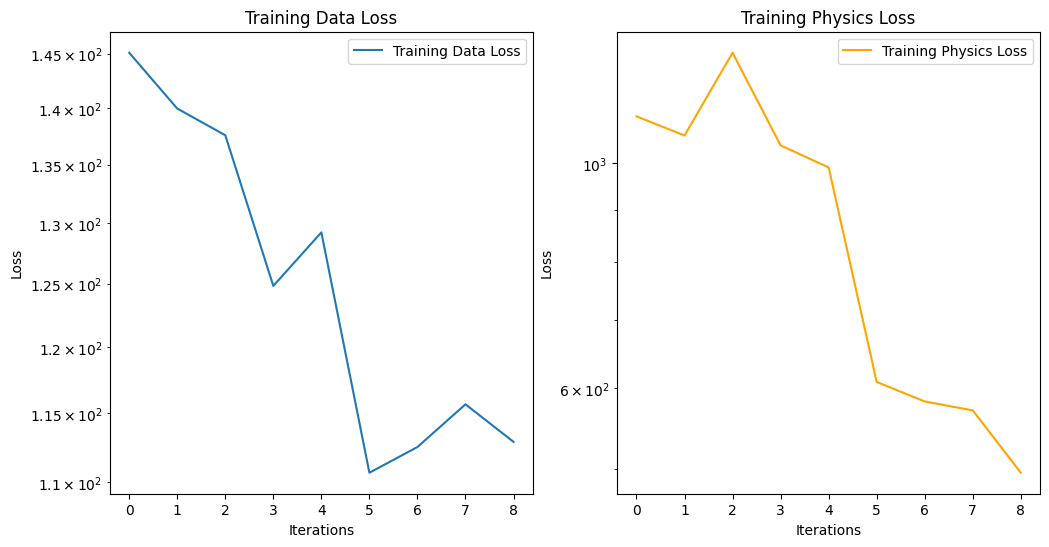

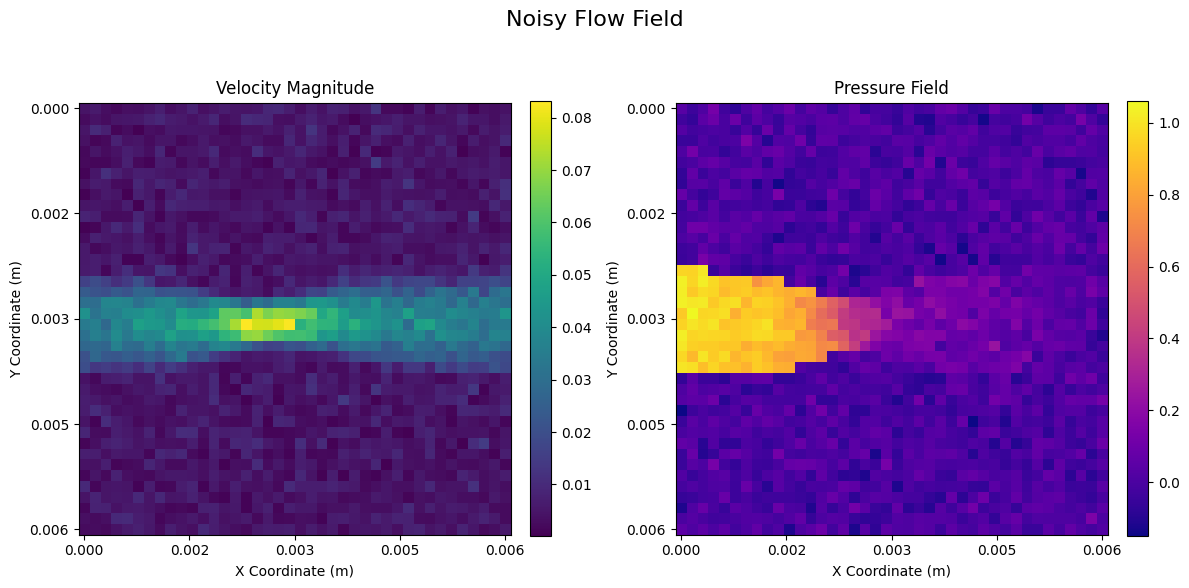

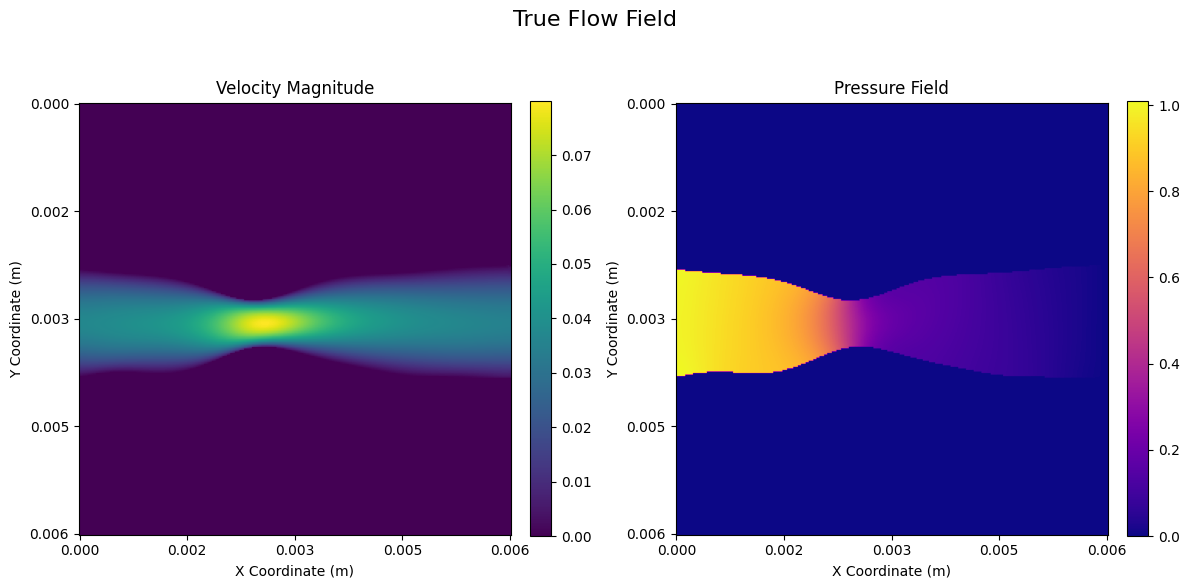

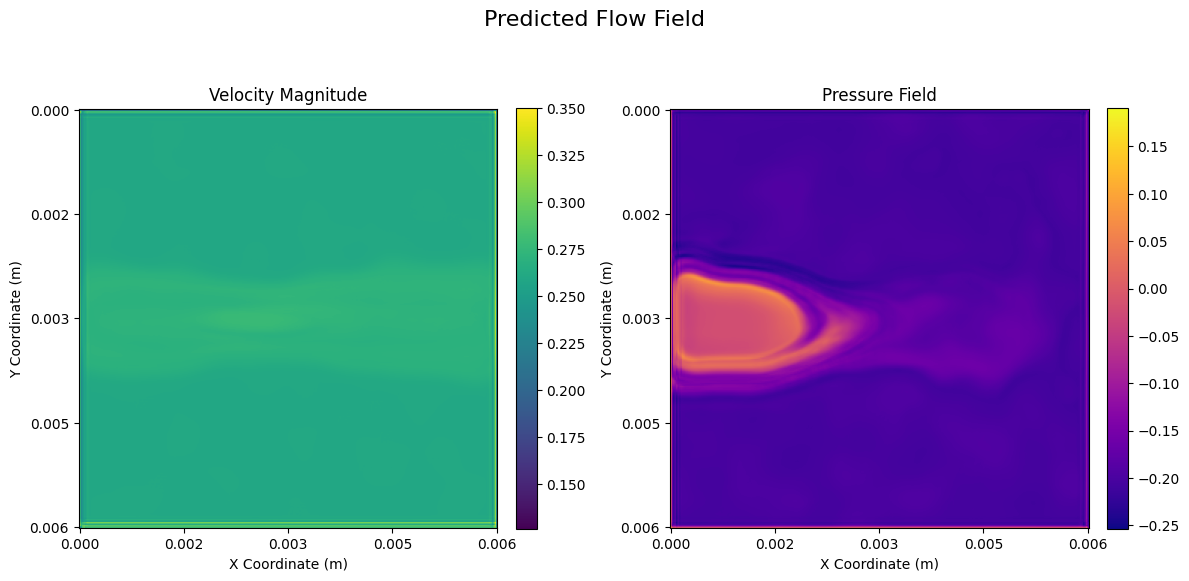

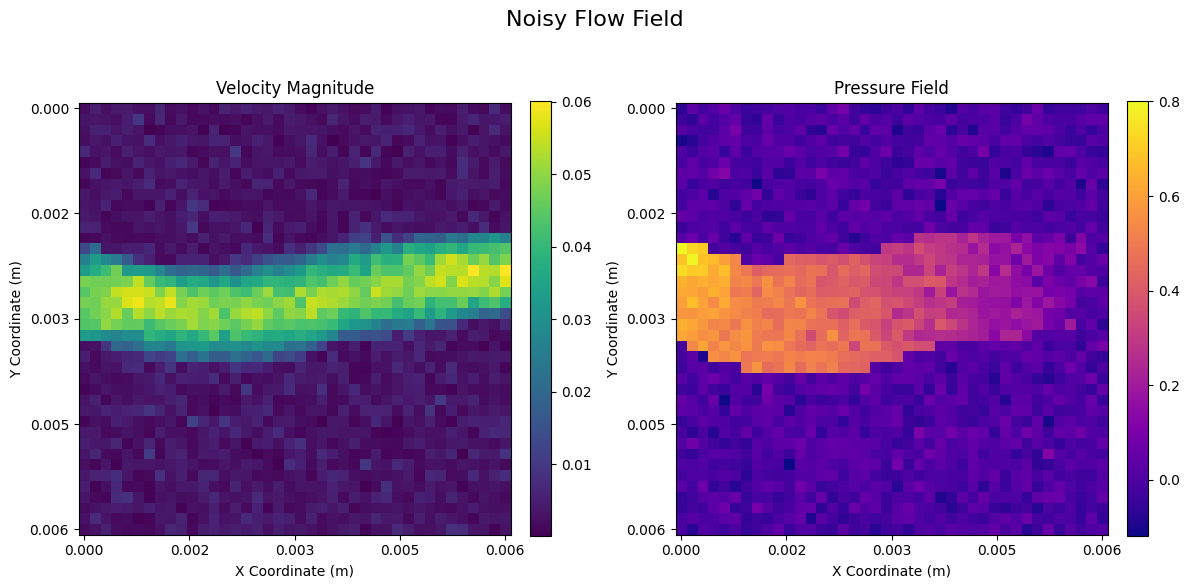

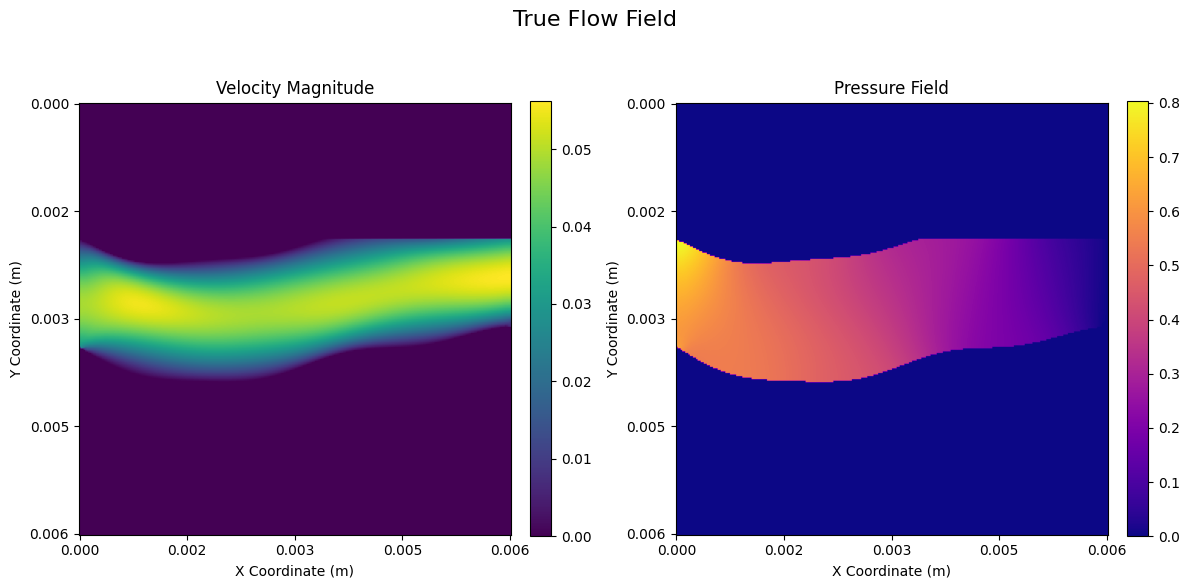

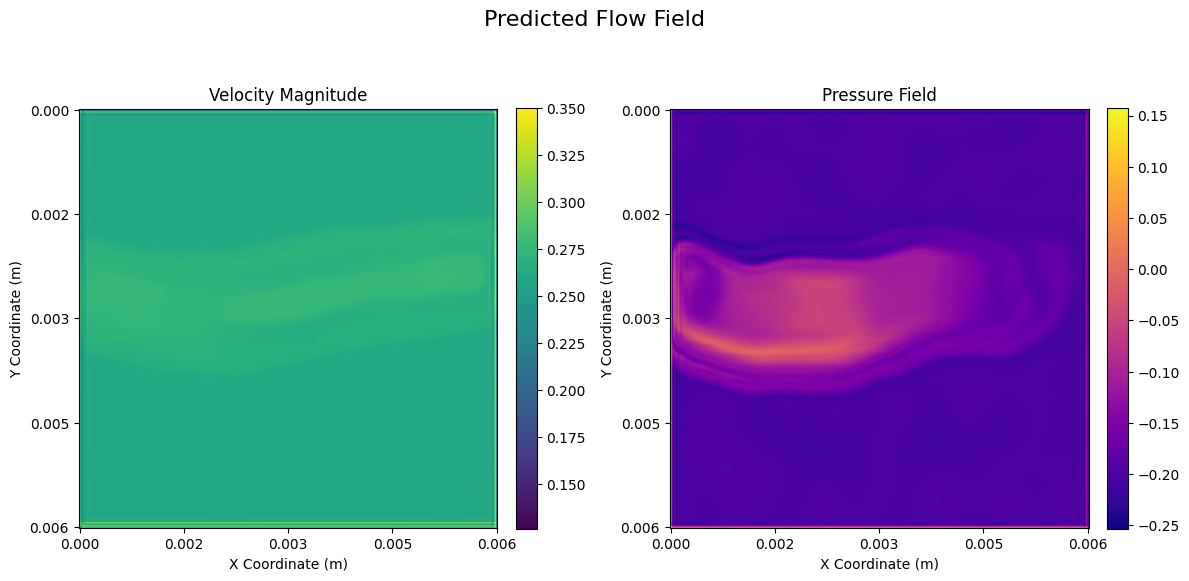

╔════════════════════════════════════════════════════════════╗
║ Results Summary                                            ║
╠════════════════════════════════════════════════════════════╣
║                   Average MSE: 0.0704
║     Velocity      Average PSNR: 36.3555 dB
║                   Average SSIM: -0.0815
╠════════════════════════════════════════════════════════════╣
║                   Average MSE: 0.1006
║     Pressure      Average PSNR: 9.9808 dB
║                   Average SSIM: -0.0980
╚════════════════════════════════════════════════════════════╝


In [ ]:
# - - - - - Plotting - - - - -

plot_results(num_epochs, results, data_losses, physics_losses, log_interval=log_interval, num_samples_to_plot=3)
print_metrics(velocity_metrics, pressure_metrics)